# Wavefunction Cuts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
import matplotlib.gridspec as gridspec
from scipy import interpolate
import sys,os
#%matplotlib inline

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

load Data

In [2]:
Wannier_Cut_dat = np.loadtxt("../data/wannier_cut.txt")

In [3]:
wannier_x = Wannier_Cut_dat[:,0]
wannier_dens = Wannier_Cut_dat[:,1]
extended_pimc_x = np.trim_zeros(Wannier_Cut_dat[:,2])
pimc_bin = Wannier_Cut_dat[:205,3]
hartree_fock_x = Wannier_Cut_dat[:,4]
hartree_fock_dens = Wannier_Cut_dat[:,5]
hartree_x = Wannier_Cut_dat[:,6]
hartree_dens = Wannier_Cut_dat[:,7]
pimc_x = Wannier_Cut_dat[:,8]
pimc_1_ave = Wannier_Cut_dat[:,9]

/Users/agdelma/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


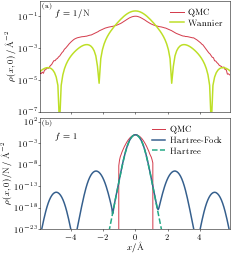

In [5]:
colors = ["#d43e4e", "#abdda4", "#3288bc"]

cmap = plt.cm.get_cmap('viridis')

colors2 = [cmap(i*0.3) for i in range(4)]

fig, ax = plt.subplots(2, 1, figsize = [3.4039, 2*2.10373]) 
ax[0].semilogy(extended_pimc_x, pimc_bin, label = "QMC", color = colors[0], linewidth=1)
ax[0].semilogy(wannier_x, wannier_dens, label = "Wannier", color = colors2[3])
#ax[0].semilogy(pimc_x, pimc_0_ave, color = colors[2])
ax[0].set_xlim(-5.9, 5.9)
ax[0].set_ylim(1e-7, 10e-1)
#ax[0].set_title("Free Particle")
#ax[0].set_xlabel(r'$a_1$(\AA)')
ax[0].set_ylabel(r'$\rho(x,0) \: / \: \rm{\AA}^{-2}$')
#ax[0].tick_params(direction="out", top = False, bottom=True, left=True, right=False)
ax[0].text(-5,0.1,r"$f = 1/ \rm{N_\graphene}$")
ax[0].text(0.01,0.98,'(a)', fontsize=7, ha='left',va='top',transform=ax[0].transAxes)
ax[0].legend(loc='upper right', handlelength = 1.5)
ax[0].set_xticklabels(['']*6)

#ax[1].set_yticks([])
ax[1].semilogy(pimc_x, pimc_1_ave, color = colors[0], label = "QMC", linewidth=1)
ax[1].semilogy(hartree_fock_x, hartree_fock_dens, label = "Hartree-Fock", color = colors2[1])
ax[1].semilogy(hartree_x, hartree_dens, label = "Hartree", linestyle = '--', color = colors2[2])
ax[1].set_xlim(-5.9, 5.9)
ax[1].set_ylim(10e-24, 10e2)
#ax[1].yaxis.set_label_position("left")
#ax[1].set_title("Unit Filling")
ax[1].set_xlabel(r'$x$/\AA')
ax[1].set_ylabel(r'$\rho(x,0) / \rm{N} \: / \: \rm{\AA}^{-2}$')
#ax[1].tick_params(direction="out", top = False, bottom=True, left=True, right=False, labelleft = True, 
#                  labelright = False)
ax[1].text(-5,0.01,r"$f = 1$")
ax[1].text(0.01,0.98,'(b)', fontsize=7, ha='left',va='top',transform=ax[1].transAxes)
ax[1].legend(loc='upper right', handlelength = 1.5)

fig.subplots_adjust(hspace=0.05)

#handles, labels = ax[0].get_legend_handles_labels()
#handles2, labels2 = ax[1].get_legend_handles_labels()
#handles.extend(handles2)
#labels.extend(labels2)
#fig.legend(handles, labels, loc='upper center', frameon = True, ncol=3, handlelength = 1.5)


#plt.legend()
#plt.show()

plt.savefig('../plots/wannier_cut.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
plt.savefig('../plots/wannier_cut.svg', bbox_inches ='tight') 